# <code>Amazon Audible</code> Dataset

![](image.png)

#### Summarry

Audible is an American online audiobook and podcast service that allows users to purchase and stream audiobooks and other forms of spoken word content. This content can be purchased individually or under a subscription model where the user receives "credits" that can be redeemed for content monthly and receive access to a curated on-demand library of content. 

#### DataSet Summary (Dataset provided by Kaggle)

- **name** = name of books
- **author** = Books authors name
- **narrator** = books narrators name
- **time** = length of books
- **releasedate** = Release date of books
- **language** = language of books
- **stars** = books get stars out of 5 stars and its also contain ratings
- **price** = price of books

Objective
- Data collecting
- PreProcessing
- Exploratory data analysis
- Conclusion

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
import polars as pl #polars

plt.style.use('fivethirtyeight')

### Data Collecting and Data Preprocessing

In [3]:
audible = pd.read_csv('audible_uncleaned.csv') #read csv file
audible.head(5) #show top 5 rows and all columns

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


#### Dataset Copy

In [4]:
df = audible.copy() #Make dataset copy which doesn't affect original dataset

### Author Name

Every <code>Author</code> Column have data in this <code><code>Writtenby:GeronimoStilton</code></code> format. change this format to this <code><code>Geronimo Stilton</code></code>.

In [5]:
df['author'] = df['author'].str.replace(r'(\w)([A-Z])',r'\1 \2',regex=True) #add space before the capital letters
df['author'] = df['author'].str.replace('Writtenby:','').str.lstrip() #repalce writternby: and strip out extra space

### Narrator Name

In [6]:
df['narrator'] = df['narrator'].str.replace(r'(\w)([A-Z])',r'\1 \2',regex=True)
df['narrator'] = df['narrator'].str.replace('Narratedby:','').str.lstrip()

### Time

In [7]:
df['hour'] = df['time'].str.extract(r'^(\d+)\s* hr')
df['minute'] = df['time'].str.extract(r'(\d+)\s*min')

In [8]:
df['hour'] = df['hour'].fillna(0)
df['minute'] = df['minute'].fillna(0)

In [9]:
df = df.astype({
  'hour':'int32',
  'minute':'int32'
})

In [10]:
df['hour'] = df['hour'].apply(lambda x:x*60)

In [11]:
df['time'] = df['hour']+df['minute']

In [12]:
df.drop(['hour','minute'],axis=1,inplace=True)

### Release Date

In [13]:
any(df['releasedate'].str.extract(r'^(\d+)-').drop_duplicates().astype('Int16'))>31

False

In [14]:
any(df['releasedate'].str.extract(r'-(\d+)').drop_duplicates().astype('Int8'))>12

False

In [15]:
any(df['releasedate'].str.extract(r'(\d+)$').drop_duplicates().astype('Int8'))>12

False

In [16]:
df['releasedate'] = pd.to_datetime(df['releasedate'], format = '%d-%m-%y')

In [17]:
df['stars'].head(1)

0    5 out of 5 stars34 ratings
Name: stars, dtype: object

In [18]:
df['rating'] = df['stars'].str.extract(r'(\d+)\s*rating').astype('Int8')
df['rating'] = df['rating'].fillna(0)

In [19]:
df['stars'] = df['stars'].str.extract(r'^(\d+)').astype('Int8')
df['stars'] = df['stars'].fillna(0)

In [20]:
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace('Free','0')

#### Change Price and Launguage data types to <code>Float32</code> and <code>category</code> Respectively

In [21]:
df = df.astype({
  'price' : 'Float32',
  'language' : 'category'
})

### Using Polars to known dataframe with its **Types**

In [22]:
pl.from_pandas(df).head(5)

name,author,narrator,time,releasedate,language,stars,price,rating
str,str,str,i64,datetime[ns],cat,i8,f32,i8
"""Geronimo Stilt…","""Geronimo Stilt…","""Bill Lobely""",140,2008-08-04 00:00:00,"""English""",5,468.0,34
"""The Burning Ma…","""Rick Riordan""","""Robbie Daymond…",788,2018-05-01 00:00:00,"""English""",4,820.0,41
"""The Deep End""","""Jeff Kinney""","""Dan Russell""",123,2020-11-06 00:00:00,"""English""",4,410.0,38
"""Daughter of th…","""Rick Riordan""","""Soneela Nankan…",676,2021-10-05 00:00:00,"""English""",4,615.0,12
"""The Lightning …","""Rick Riordan""","""Jesse Bernstei…",600,2010-01-13 00:00:00,"""English""",4,820.0,-75


### Exploratory data Analysis

#### Number of Books writtern by Authors

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36020 (\N{CJK UNIFIED IDEOGRAPH-8CB4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30690 (\

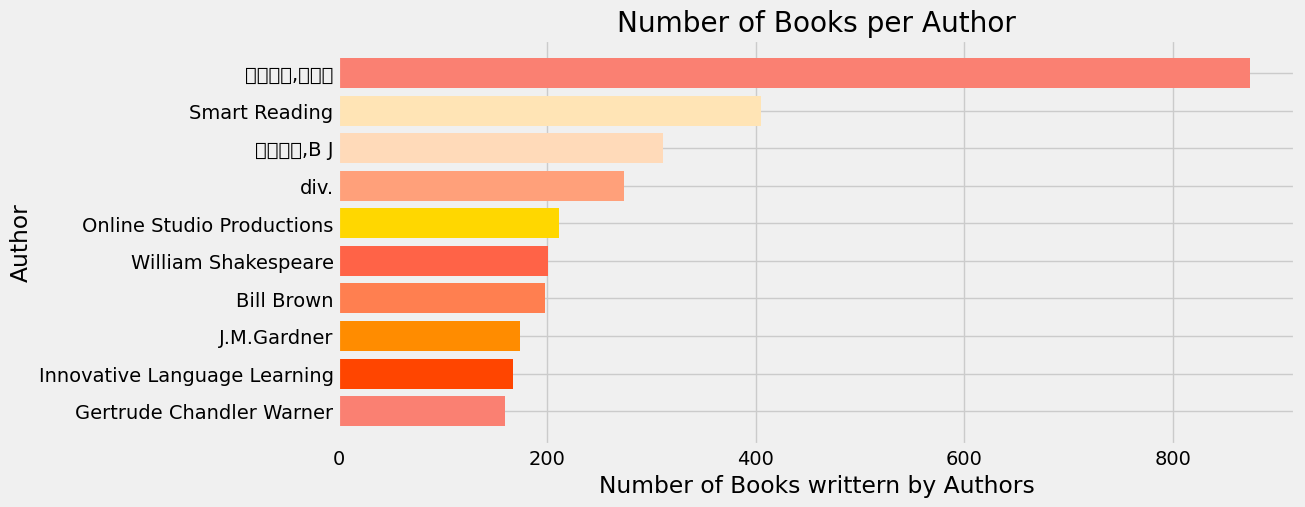

In [23]:
author_counts = df['author'].value_counts().sort_values(ascending=False).head(10)

#create author counts dataframe

df_author_counts = pd.DataFrame({'author':author_counts.index,'number_of_books':author_counts.values})
df_author_counts = df_author_counts.sort_values(by='number_of_books', ascending=True)

#create the plots
barcolor = ('#FA8072', '#FF4500', '#FF8C00', '#FF7F50', '#FF6347', '#FFD700', '#FFA07A', '#FFDAB9', '#FFE4B5', '#FA8072','#FFA500')
plt.figure(figsize=(11,5))
plt.barh(df_author_counts['author'], df_author_counts['number_of_books'], color = barcolor)
plt.title('Number of Books per Author')
plt.ylabel('Author')
plt.xlabel('Number of Books writtern by Authors')
plt.show()


#### Number of Books narrated by Top 10s narrators

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 30690 (\N{CJK UNIFIED IDEOGRAPH-77E2}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:

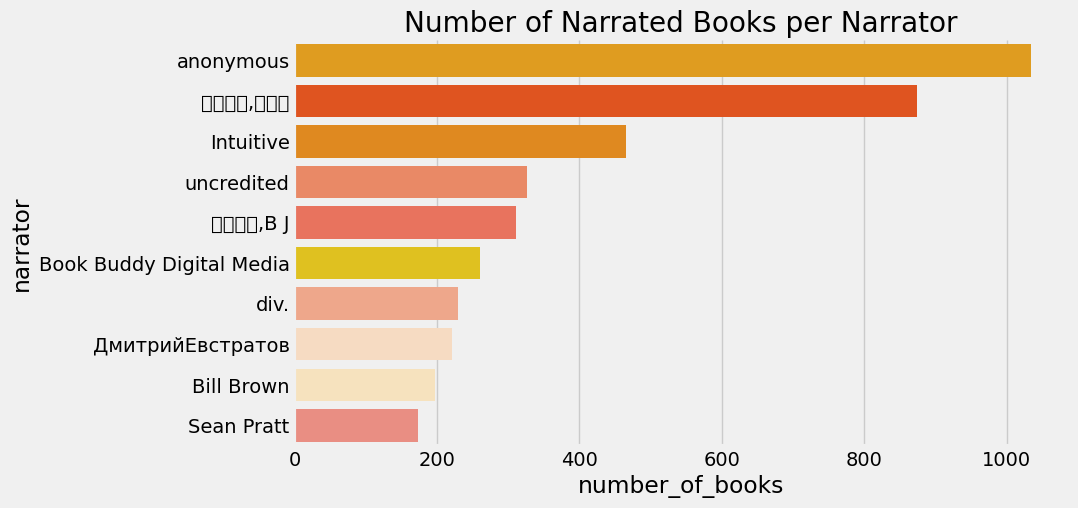

In [24]:
narrator_counts = df['narrator'].value_counts().sort_values(ascending = False).head(10)

# Create narrator dataframe

df_narrator_counts = pd.DataFrame({'narrator':narrator_counts.index, 'number_of_books':narrator_counts.values})

#create the plots

colors = ['#FFA500', '#FF4500', '#FF8C00', '#FF7F50', '#FF6347', '#FFD700', '#FFA07A', '#FFDAB9', '#FFE4B5', '#FA8072']

sns.catplot(data = df_narrator_counts, x = 'number_of_books', y = 'narrator', kind = 'bar', height=5, aspect=11/5, palette=colors)
plt.title('Number of Narrated Books per Narrator')
plt.show()


#### Top 5 <code>Author</code> based on Ratings

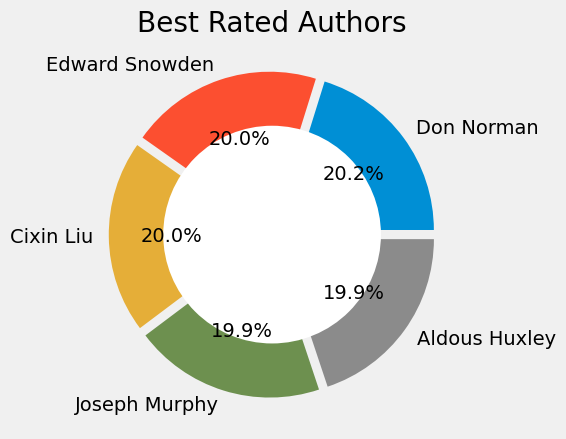

In [25]:
df_sorted = df.sort_values(by='rating', ascending=False) #sorting ratings to Descending orders
author_ratings = df_sorted[['author', 'rating']].head(5) #temporary table

#visualize by Pie Chart

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(author_ratings['rating'],labels = author_ratings['author'],autopct = '%0.01f%%',explode = explode)

# draw circle

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart

fig.gca().add_artist(centre_circle)

# Adding Title of chart

plt.title('Best Rated Authors')
plt.show()

#### Top 5 most Rated books on their launguage

In [26]:
# First, find the top 5 languages in the dataset
top_languages = df['language'].value_counts().index[:5]

# Filter the dataframe to only include books in the top 5 languages
df_top_languages = df[df['language'].isin(top_languages)]

# Group by 'language' and 'name', calculate mean rating
grouped = df_top_languages.groupby(['language', 'name'])['rating'].mean()

# Sort the ratings in descending order and select the top 5 for each language
top_books = grouped.groupby('language').nlargest(5).reset_index(level=0, drop=True)

# Convert Series to DataFrame
top_books.reset_index().head(25)



,language,name,rating
0,English,The Design of Everyday Things,127.0
1,English,The Three-Body Problem,126.0
2,English,Brave New World,125.0
3,English,The Ocean of Churn,125.0
4,English,A Promised Land,124.0
5,Hindi,!Aycons Management Snippets,<NA>
6,Hindi,"""... gegen die Verhexung des Verstandes""",<NA>
7,Hindi,"""... und nie kann ich vergessen""",<NA>
8,Hindi,"""All the Real Indians Died Off""",<NA>
9,Hindi,"""Aus gutem Holze""",<NA>


#### Author average rated <code>Books</code>

In [27]:
df.groupby(['name','author'])['rating'].mean().sort_values(ascending = False).reset_index().head(10)

,name,author,rating
0,The Design of Everyday Things,Don Norman,127.0
1,The Three-Body Problem,Cixin Liu,126.0
2,Permanent Record,Edward Snowden,126.0
3,The Ocean of Churn,Sanjeev Sanyal,125.0
4,Brave New World,Aldous Huxley,125.0
5,Attitude Is Everything,Jeff Keller,124.0
6,"Harry Potter and the Order of the Phoenix, Book 5",J.K.Rowling,124.0
7,A Promised Land,Barack Obama,124.0
8,A Game of Thrones,George R.R.Martin,123.0
9,The Dutch House,Ann Patchett,122.0


#### <code>Books</code> that require lowest to maximum time to Finish

In [28]:
df.groupby('name')['time'].agg(['min', 'mean', 'max']).sort_values(by = ['min','mean','max'], ascending = False).head(10)

,min,mean,max
name,,,
All DEAD,8595,8595.0,8595
The Decline and Fall of the Roman Empire,7591,7591.0,7591
鈴木三重吉童話全集（全270話収録）,7363,7363.0,7363
Mayo Clinic Family Health Book: 5th Edition,6711,6711.0,6711
10 Masterpieces You Have to Read Before You Die 1,6139,6139.0,6139
The Catholic Audio Bible,5913,5913.0,5913
50 Self-Help Classics to Guide You to Financial Freedom,5701,5701.0,5701
Gods of the Ragnarok Era Complete Collection: Eschaton Cycle,5560,5560.0,5560
Siri Guru Granth Sahib,5545,5545.0,5545


#### In Which Year <code>Most Books</code> Released

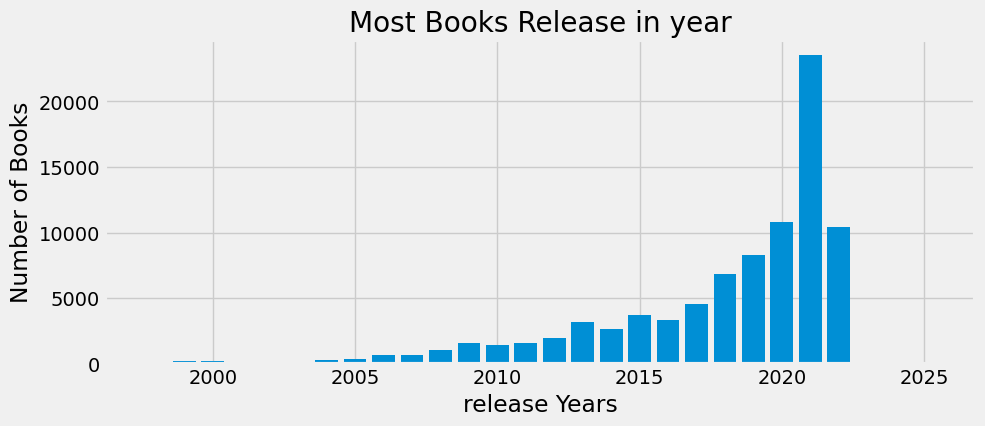

In [29]:
released_books = df['releasedate'].dt.year.value_counts(ascending = False) #extract year from release date and value counts aaplied
released_books = pd.DataFrame({'Release year':released_books.index, 'books count':released_books.values}) #creating the  dataframe


# Ploting Bar graph to show In which Year most book Released

plt.figure(figsize=(10,4)) #figure size
plt.bar(released_books['Release year'],released_books['books count']) #barplot
plt.title('Most Books Release in year') #plot title
plt.xlabel('release Years') #x axis label
plt.ylabel('Number of Books') #y axis label
plt.show()

#### Most Common Language Books

In [30]:
language_books = df['language'].value_counts(ascending = False)
language_books = pd.DataFrame({'language':language_books.index, 'number of books':language_books.values})
language_books.head(10)

,language,number of books
0,English,61884
1,german,8295
2,spanish,3496
3,japanese,3167
4,italian,2694
5,french,2386
6,russian,1804
7,danish,935
8,portuguese,526
9,swedish,515


#### Most <code>5 Stars</code> Books written by <code>Authors</code>

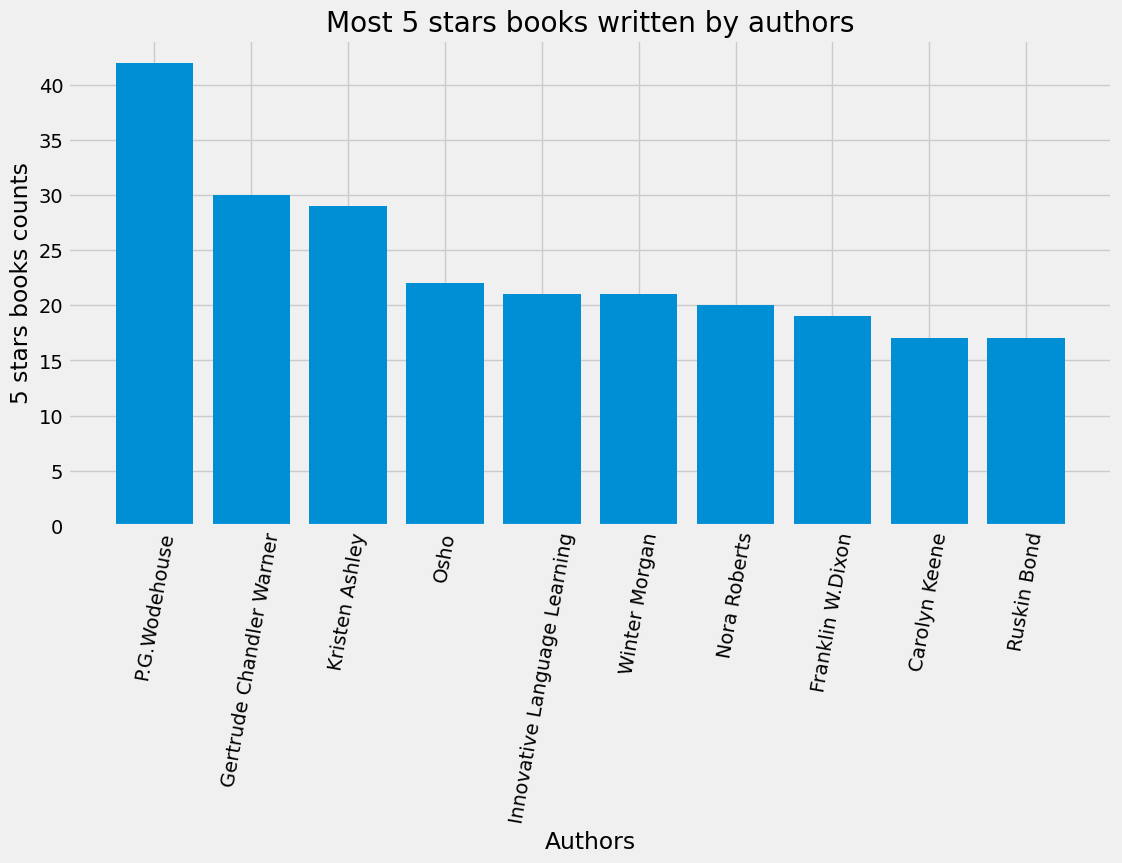

In [31]:
five_stars = df[df['stars']==5]
author_five = five_stars['author'].value_counts()
author_five = pd.DataFrame({'author':author_five.index,'5 stars books':author_five.values}).head(10)
plt.figure(figsize=(12,6))
plt.bar(author_five['author'],author_five['5 stars books'])
plt.title('Most 5 stars books written by authors')
plt.xlabel('Authors')
plt.ylabel('5 stars books counts')
plt.xticks(rotation=80)
plt.show()

#### Coorelation Between <code>Price</code> and <code>Ratings</code> of Books

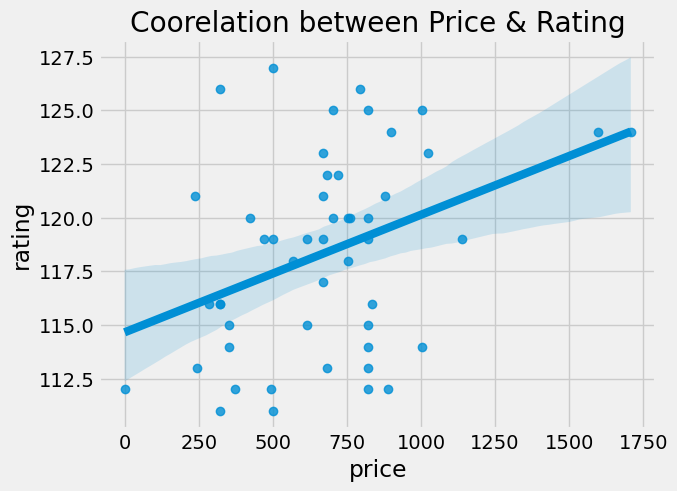

In [32]:
price_and_rating = df[['price','rating']].sort_values(by='rating', ascending=False).head(50)
price_and_rating = price_and_rating.astype({'price':'float32','rating':'float32'})
sns.regplot(data=price_and_rating, x='price', y='rating')
plt.title('Coorelation between Price & Rating')
plt.show()

### Conclusion

#### Based on the analysis of the data, here are some key findings:

1. **Authorship**: The distribution of books across authors shows a diverse range of literary contributions. This reflects the vibrant and dynamic nature of the literary world, where both established and emerging authors coexist.

2. **Narration**: The top 10 narrators have a significant impact on the audiobook industry, demonstrating the importance of narration in enhancing the listener's experience.

3. **Top-rated Authors**: The top 5 authors based on ratings have consistently produced high-quality content, earning them recognition and acclaim from readers.

4. **Language and Ratings**: The top 5 most rated books in their respective languages highlight the global appeal of literature and the universal nature of storytelling.

5. **Author Ratings**: The average ratings of books by each author provide insights into their consistent performance and reader satisfaction.

6. **Reading Duration**: The range of time required to finish books varies widely, catering to different reader preferences and schedules.

7. **Yearly Book Releases**: The year with the most book releases indicates a peak in literary activity, possibly influenced by various cultural, social, or economic factors.

8. **Language Distribution**: The most common language for books underscores the influence of that language in global literature.

9. **Price-Rating Correlation**: The correlation between price and ratings offers insights into reader perception of value and quality.

These findings offer valuable insights into various aspects of the book industry, from authorship to reader preferences.